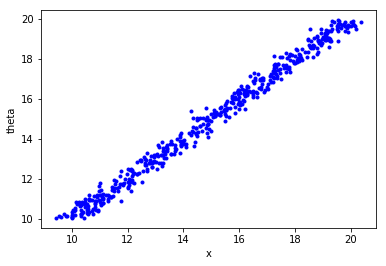

In [1]:
import delfi.distribution as dd
import delfi.generator as dg
import delfi.inference as infer
import delfi.summarystats as ds
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from delfi.simulator.GaussZtrans import GaussZtrans

n_params = 2

kwargs = {'params_mean': np.array([0., 0.]),
          'params_std': np.array([1., 1.]),
          'stats_mean': np.array([0., 0.]),
          'stats_std': np.array([1., 1.])}

seed = 42
m = GaussZtrans(dim=n_params, seed=seed, **kwargs)
p = dd.Uniform(lower=10*np.ones((n_params, )), 
               upper=20*np.ones(n_params, ),
               seed=seed)
s = ds.Identity()
g = dg.Default(model=m, prior=p, summary=s)

_, obs = g.gen(1)

# generate and plot
params, stats = g.gen(250)
plt.plot(stats, params, 'b.');
plt.xlabel('x')
plt.ylabel('theta')

# set up inference
#res = infer.CDELFI(g, obs=obs, n_components=2)

res = infer.Basic(g, n_hiddens=[10], seed=seed, svi=True)
#res.params_mean = kwargs['params_mean']
#res.params_std = kwargs['params_std']
#res.stats_mean = np.mean(stats)
#res.stats_std = np.std(stats)

# run with N samples
out = res.run(1500)

In [2]:
posterior = res.predict(np.array([15., 15.]).reshape(1,-1), 
                        ztrans_inv=True)

In [3]:
posterior.xs[0].m

array([ 15.04117263,  15.04391621])

In [4]:
posterior.xs[0].S

array([[ 0.09722625, -0.00125968],
       [-0.00125968,  0.10146409]])

In [5]:
posterior = res.predict(np.array([100., 100.]).reshape(1,-1), 
                        ztrans_inv=False)

In [6]:
posterior.xs[0].m

array([ 7.03909826,  6.99283648], dtype=float32)

In [7]:
posterior.xs[0].S

array([[ 124.10865784,  123.70066833],
       [ 123.70066833,  123.49730682]], dtype=float32)

In [70]:
res.params_mean

array([ 77.5,  77.5])

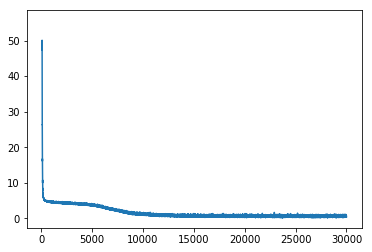

In [20]:
out = out
plt.plot(out['trn_iter'], out['trn_val'])